# under construction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyrtools as ppt
# import pyrtools.JBhelpers as jbh

Some examples using the tools in this distribution.
Contents

    - Load an image, and downsample to a size appropriate for the machine speed.
    - Synthetic images.
    - Point operations (lookup tables):
    - histogram Modification/matching:
    - Convolution routines:
    - Compare speed of convolution/downsampling routines:
    - Display image and extension of left and top boundaries
    
    - see Tutorial/pyramids.ipynb
            Multi-scale pyramids
            A Laplacian pyramid:
            Wavelet/QMF pyramids:
            Steerable pyramid:
            Steerable pyramid, constructed in frequency domain:

Load an image, and downsample to a size appropriate for the machine speed.

In [2]:
oim = plt.imread('../pyrtools/data/einsteinCorrect.pgm').astype(float)

In [3]:
filt = np.ones((2,2)) / 4

In [4]:
# %%timeit
import time
t = time.time()
ppt.corrDn(oim, filt, edges='reflect1', step=(2, 2), start=(0, 0), stop=None, result=None)
elapsed = time.time() - t

In [5]:
imSubSample = min(max(np.floor(np.log2(elapsed)/2+3),0),2)
imSubSample

0

In [6]:
im = ppt.blurDn(oim, n_levels=imSubSample, filt='qmf9')

ShowIm: 3 types of automatic graylevel scaling, 2 types of automatic sizing, with or without title and Range information.

In [7]:
? ppt.showIm

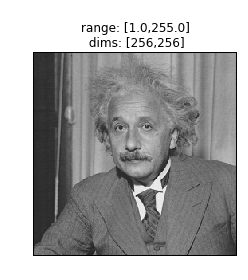

In [8]:
ppt.showIm(im)

# showIm(im,'auto1','auto','Al')

# showIm('im','auto2')

# showIm(im,'auto3',2)

 Statistics:

In [9]:
ppt.imStats(im)

Image statistics:
  Range: [1.000000, 255.000000]
  Mean: 116.456772,  Stdev: 39.899688,  Kurtosis: 3.433610


Synthetic images.

In [10]:
# pick some parameters
size      = 256
direction = 2 * np.pi * np.random.rand(1)
slope     = 10 * np.random.rand(1) - 5
intercept = 10 * np.random.rand(1) - 5
origin    = np.round(size * np.random.rand(2,1)).astype(int)
exponent  = 0.8 + np.random.rand(1)
amplitude = 1 + 5 * np.random.rand(1)
phase     = 2 * np.pi * np.random.rand(1)
period    = 20
twidth    = 7

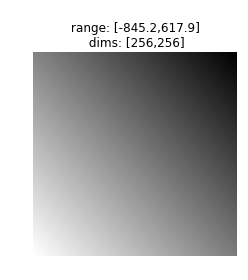

In [11]:
ppt.showIm(ppt.mkRamp(size, direction, slope, intercept, origin))

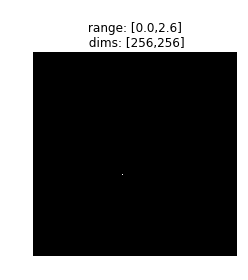

In [12]:
ppt.showIm(ppt.mkImpulse(size, origin, amplitude))

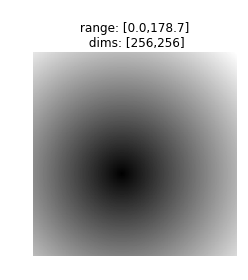

In [13]:
ppt.showIm(ppt.mkR(size, exponent, origin))

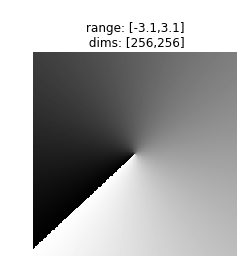

In [14]:
ppt.showIm(ppt.mkAngle(size, direction))

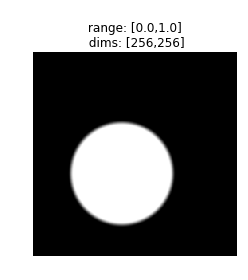

In [15]:
ppt.showIm(ppt.mkDisc(size, size/4, origin, twidth))

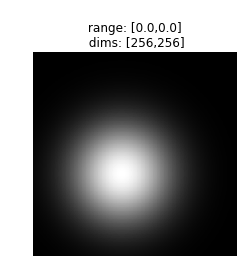

In [16]:
ppt.showIm(ppt.mkGaussian(size, (size/6)**2, origin, 'norm'))

In [17]:
# TODO fix normalization - range
g = ppt.mkGaussian(size, (size/6)**2, origin, 'norm')
g.min(), g.max()

(5.1557999662965414e-10, 8.742642137616321e-05)

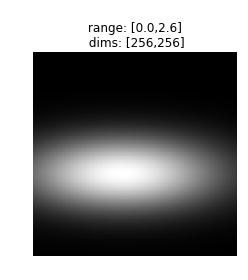

In [18]:
ppt.showIm(ppt.mkGaussian(size, ((size/8)**2,(size/3)**2), origin, amplitude))

[[  12765.  -28981.]
 [ -28981.  116792.]]


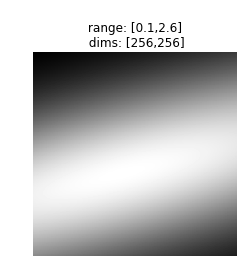

In [19]:
cov = (size * np.random.uniform(-1,1,(2,2)))
cov = cov.dot(cov.T)
print(np.round(cov))
# TODO fix

ppt.showIm(ppt.mkGaussian(size, cov, origin, amplitude))

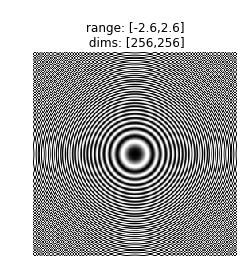

In [20]:
ppt.showIm(ppt.mkZonePlate(size, amplitude, phase))

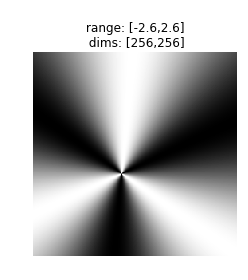

In [21]:
ppt.showIm(ppt.mkAngularSine(size, 3, amplitude, phase, origin))

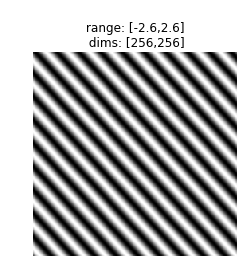

In [22]:
ppt.showIm(ppt.mkSine(size, period, direction, amplitude=amplitude, phase=phase, origin=origin))

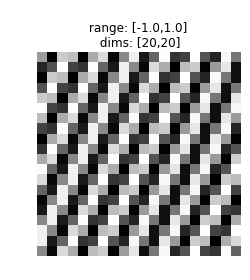

In [23]:
ppt.showIm(ppt.mkSine(20, frequency=[1,2]))

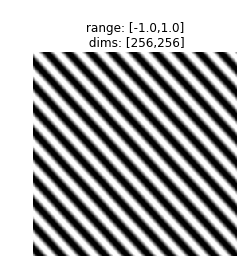

In [24]:
ppt.showIm(ppt.mkSquare(size, period, direction, amplitude, phase=phase, origin=origin, twidth=twidth))

Symmetry error in creating fractal


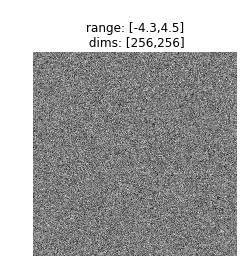

In [25]:
ppt.showIm(ppt.mkFract(size, exponent))
# TODO

Point operations (lookup tables):

## TODO

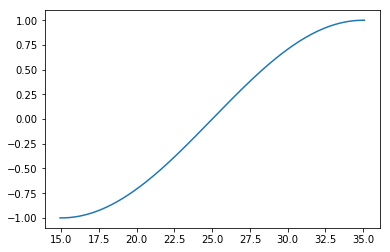

In [26]:
Xtbl,Ytbl = ppt.rcosFn(width=20, position=25, values=(-1, 1))
plt.plot(Xtbl,Ytbl)
plt.show()

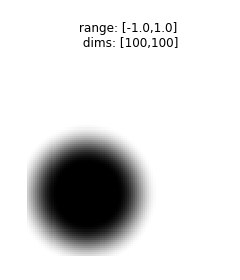

In [27]:
ppt.showIm(ppt.pointOp(ppt.mkR(100,1,[70,30]), Ytbl, Xtbl[0], Xtbl[1]-Xtbl[0], 0))

histogram Modification/matching:

In [29]:
N, X    = ppt.matlab_histo(im, 150)
mn, mx  = ppt.range2(im)

In [32]:
mtx = np.random.uniform(size=im.shape)
[oN, oX] = ppt.matlab_histo(mtx, N.size)
oStep = oX[0,1] - oX[0,0]
oC = np.concatenate(( np.array([0]), np.cumsum(oN / oN.sum()) ))

# if mode == 'centers':         # convert to edges
#     nStep = X[0,1] - X[0,0]
#     nX = np.concatenate((np.array([X[0,0] - 0.5 * nStep]),
#                             np.array( X[0,:] + 0.5 * nStep)))
# else:
nX = X.flatten()

In [33]:
# HACK: no empty bins ensures nC strictly monotonic
N = N + N.mean() / 1e8
nC = np.concatenate((np.array([0]), np.cumsum(N / N.sum()) ))

In [35]:
from scipy.interpolate import interp1d
# unlike in matlab, interp1d returns a function
func = interp1d(nC, nX, 'linear')
nnX = func(oC)

ValueError: A value in x_new is above the interpolation range.

In [28]:
matched = ppt.histoMatch(np.random.uniform(size=im.shape), N, X)

ValueError: A value in x_new is above the interpolation range.

In [ ]:
N, X    = ppt.matlab_histo(im, 150)
mn, mx  = ppt.range2(im)

In [ ]:
N.shape,X.shape, mn, mx

In [ ]:
np.random.uniform(size=im.shape).shape

In [ ]:
matched = ppt.histoMatch(np.random.uniform(size=im.shape), N, X)

ppt.showIm(im)
ppt.showIm(matched)

In [ ]:
Nm, Xm = ppt.matlab_histo(matched,150)
plt.figure()
plt.plot(X.flatten()[:-1],N.flatten())
plt.plot(Xm.flatten()[:-1],Nm.flatten())
plt.show()
# plt.plot(Xm,Nm)
# plt.axes([mn, mx, 0, max(N)])

In [ ]:
matPyr = scipy.io.loadmat('../TESTS/matFiles/histoMatch0.mat')
# adding 0.7 to get the bins to line up between matlab and python
# answers between matlab and python may be different,
# but not necessarily incorrect.
# similar to histo above
ramp = ppt.mkRamp(10) + 0.7
disc = ppt.mkDisc(10) + 0.7
(rN,rX) = ppt.matlab_histo(ramp)
res = ppt.histoMatch(disc, rN, rX, 'edges')
ppt.compareRecon(matPyr['res'], res)
ppt.showIm(res)
ppt.showIm(matPyr['res'])

Convolution routines:
Compare speed of convolution/downsampling routines:

In [ ]:
noise = np.random.rand(400)
filt  = np.random.rand(10)

In [ ]:
%%timeit
res1 = corrDn(noise,filt(10:-1:1,10:-1:1),'reflect1',[2 2])

In [ ]:
%%timeit
ires = rconv2(noise,filt)
res2 = ires(1:2:400,1:2:400)

In [ ]:
imStats(res1,res2)

Display image and extension of left and top boundaries:

In [ ]:
fsz = [9, 9]
fmid = ceil((fsz+1)/2)
imsz = [16, 16]

# pick one:
im = eye(imsz)
im = mkRamp(imsz,pi/6)
im = mkSquare(imsz,6,pi/6)

# pick one:
edges='reflect1'
edges='reflect2'
edges='repeat'
edges='extend'
edges='zero'
edges='circular'
edges='dont-compute'

filt = mkImpulse(fsz,[1 1])
showIm(corrDn(im,filt,edges))
line([0,0,imsz(2),imsz(2),0]+fmid(2)-0.5, ...
     [0,imsz(1),imsz(1),0,0]+fmid(1)-0.5)
title(sprintf('Edges = %s',edges))